In [85]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df,
                       how='outer', on='city')
# # # Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

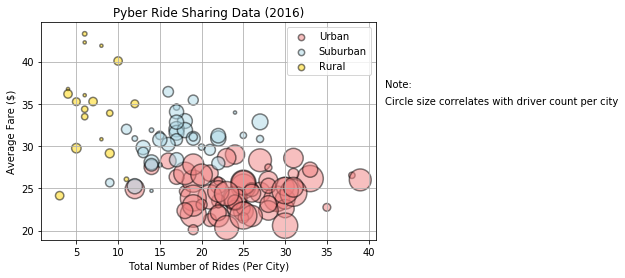

In [86]:
# Obtain the x and y coordinates for each of the three city types
average_fare = combined_df.groupby("city")["fare"].mean()
total_rides = combined_df.groupby("city")["ride_id"].count()
total_drivers = combined_df.groupby("city")["driver_count"].mean()

city_type = city_df.set_index('city')['type']

bubble_df = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type
                         })

urban = bubble_df.loc[bubble_df["City Type"]== "Urban"]

suburban = bubble_df.loc[bubble_df["City Type"]== "Suburban"]

rural = bubble_df.loc[bubble_df["City Type"]== "Rural"]

# Build the scatter plots for each city types
Urban = plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "lightcoral", 
            edgecolors="black", s = urban["Number of Drivers"]*10, label = "Urban", alpha = 0.5, linewidth = 1.5)

Suburban = plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightblue", 
            edgecolors ="black", s = suburban["Number of Drivers"]*10, label = "Suburban", alpha = 0.5, linewidth = 1.5)

Rural = plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "gold", 
            edgecolors = "black", s = rural["Number of Drivers"]*10, label = "Rural", alpha = 0.5, linewidth = 1.5)

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# # plt.text(30, 10,"Note: Circle size correlates with driver count per city.")

# # Create a legend
leg1 = plt.legend(handles=[Urban, Suburban, Rural], loc = "best")
leg1.legendHandles[0]._sizes = [40]
leg1.legendHandles[1]._sizes = [40]
leg1.legendHandles[2]._sizes = [40]

plt.text(42,35,"Circle size correlates with driver count per city")
plt.text(42,37,"Note:")

# Save Figure
plt.savefig("Bubble_Chart.png")

In [87]:
# Show plot
plt.show()

## Total Fares by City Type

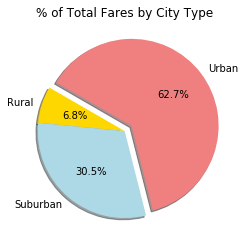

In [88]:
# Calculate Type Percents
total_fare = combined_df['fare'].sum()
type_fare = combined_df.groupby("type")["fare"].sum()
percent_fare = type_fare / total_fare

# # Build Pie Chart
explode = [0,0,.1]
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold","lightblue","lightcoral"]
plt.pie(percent_fare, explode=explode, labels=labels, colors=colors,
        shadow=True, autopct = "%1.1f%%",startangle = 150)
plt.title("% of Total Fares by City Type")


# # Save Figur
plt.savefig("Pie_Chart_Fares.png")

In [89]:
# Show Figure
plt.show()

## Total Rides by City Type

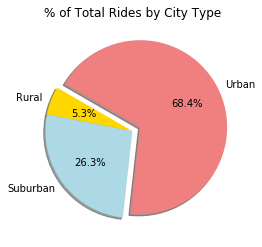

In [90]:
# Calculate Ride Percents
total_rides_all = combined_df['type'].count()
total_rides_new = combined_df.groupby("type")["ride_id"].count()
percent_count = total_rides_new / total_rides_all

# Build Pie Chart
explode = [0,0,.1]
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold","lightblue","lightcoral"]
plt.pie(percent_count, explode=explode, labels=labels, colors=colors,
        shadow=True, autopct = "%1.1f%%",startangle = 150)
plt.title("% of Total Rides by City Type")

# Save Figur
plt.savefig("Pie_Chart_Rides.png")

In [91]:
# Show Figure
plt.show()

## Total Drivers by City Type

/Users/deniscohen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


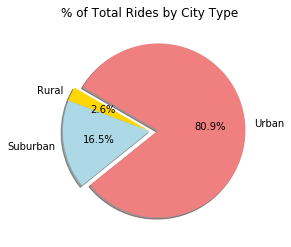

In [92]:
# Calculate Driver Percents
total_drivers_type = city_df.groupby("type").sum()
city_dups_df = city_df.drop_duplicates('city')
total_drivers = city_dups_df['driver_count'].sum()
percent_drivers = total_drivers_type / total_drivers

# Build Pie Charts
explode = [0,0,.1]
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold","lightblue","lightcoral"]
plt.pie(percent_drivers, explode=explode, labels=labels, colors=colors,
        shadow=True, autopct = "%1.1f%%",startangle = 150)
plt.title("% of Total Rides by City Type")

# # Save Figure
plt.savefig("Pie_Chart_Drivers.png")

In [93]:
# Show Figure
plt.show()